# CS/INFO 5304 Data Science in the Wild: HW4

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


## Part 1

Start with the ‘Karate Club’ dataset which was composed by asking 33 children who were all in the same karate club to list their friends. Each edge represents a friendship, and each node represents a child in Karate club. 


In [14]:
G = nx.karate_club_graph()

### A

Make a visualization of the network (hint: draw()). Title this visualization “Karate Network”.

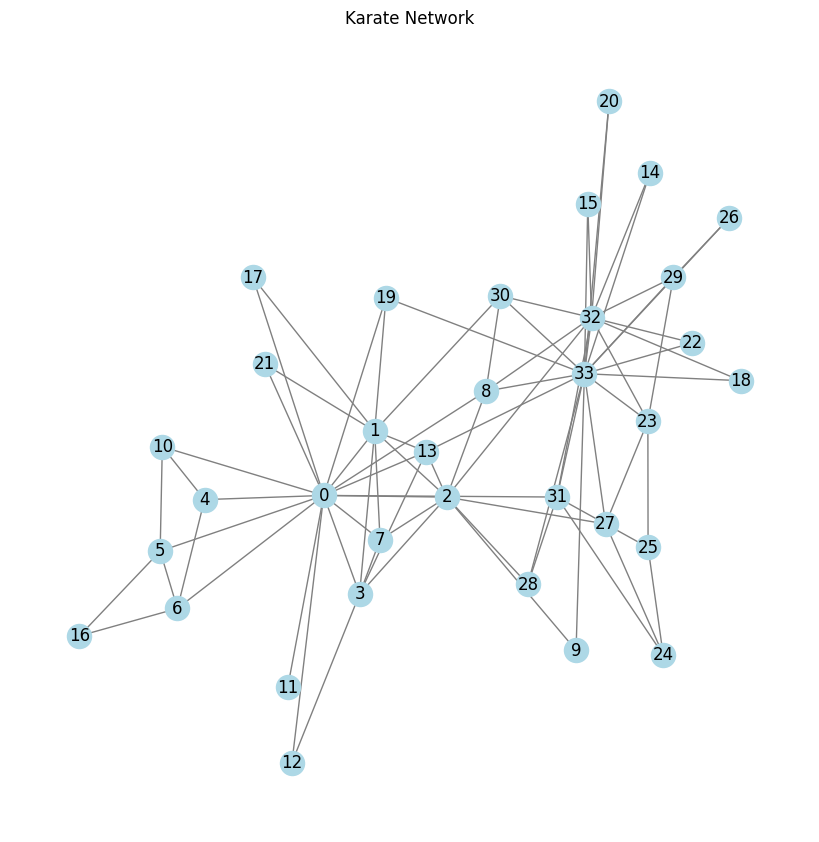

In [15]:
# Visualize the graph
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Karate Network")
plt.show()

### B

Using the Louvain method for undirected graphs, find the best partition of the network. How many communities does this method produce? List the size of each community in descending order.

In [16]:
import community as community_louvain

# Apply the Louvain method
partition = community_louvain.best_partition(G)

# Determine the number of communities and their sizes
community_sizes = {}
for node in partition:
    community = partition[node]
    if community in community_sizes:
        community_sizes[community] += 1
    else:
        community_sizes[community] = 1

# Sort and print the community sizes
sorted_communities = sorted(community_sizes.values(), reverse=True)
number_of_communities = len(sorted_communities)
sorted_communities

print(f"Number of communities: {number_of_communities}")
print(f"Community sizes: {sorted_communities}")


Number of communities: 4
Community sizes: [14, 11, 5, 4]


### C

Use the Girvan Newman method to split the Karate community into two groups. How big are these two groups? (list in descending order).


In [17]:
from networkx.algorithms.community import girvan_newman

# Apply the Girvan-Newman method
comp = girvan_newman(G)
# Get the first result of the splitting into two communities
two_communities = tuple(sorted(c) for c in next(comp))

# Sizes of the two communities
sizes_of_two = (len(two_communities[0]), len(two_communities[1]))
sorted_sizes_of_two = sorted(sizes_of_two, reverse=True)

print(f"Sizes of the two communities: {sorted_sizes_of_two}")


Sizes of the two communities: [19, 15]


### D

Make a visualization of the network, now where the nodes are colored by which community they belong to, according to the Louvain method. Title this visualization "Visualization of Louvain Groups".


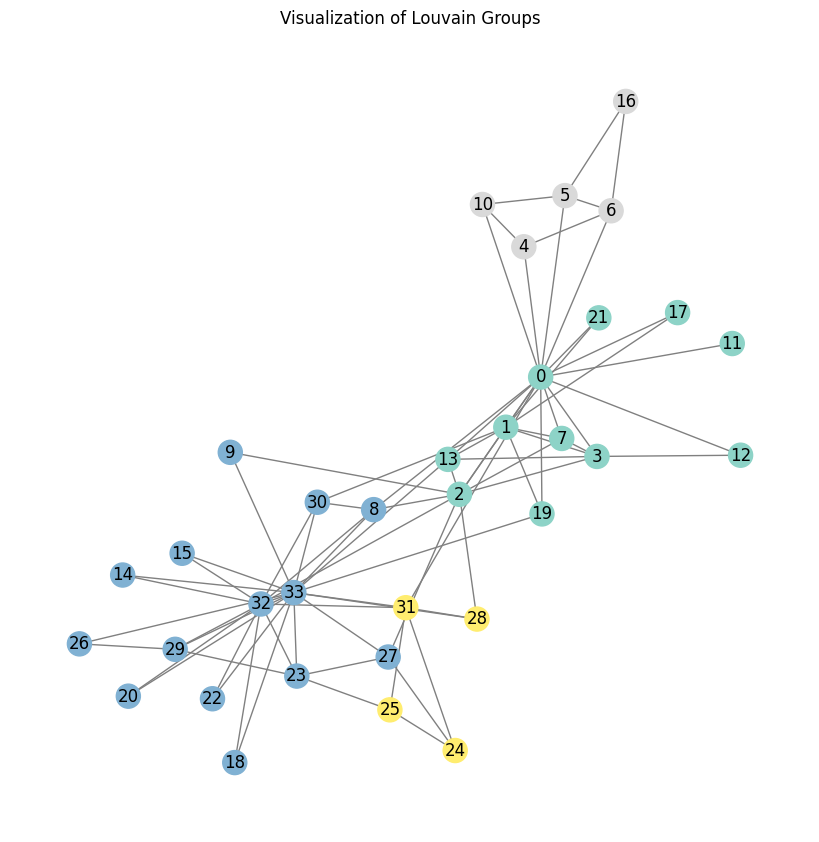

In [18]:
# Map the partition to a color map
color_map = []
for node in G:
    color_map.append(partition[node])

# Visualize the graph with community colors
plt.figure(figsize=(8, 8))
nx.draw(G, node_color=color_map, with_labels=True, cmap=plt.cm.Set3, edge_color='gray')
plt.title("Visualization of Louvain Groups")
plt.show()


## Part 2

How many communities does this method produce?


In [19]:
import wget

url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'
filename = wget.download(url)


In [20]:
import gzip

# Load the graph from the text file
with gzip.open(filename, 'rt') as f:
    G = nx.read_edgelist(f)


In [21]:
import community as community_louvain

# Apply the Louvain method
partition = community_louvain.best_partition(G)

# Determine the number of communities and their sizes
community_sizes = {}
for node in partition:
    community = partition[node]
    if community in community_sizes:
        community_sizes[community] += 1
    else:
        community_sizes[community] = 1

# Sort and print the community sizes
sorted_communities = sorted(community_sizes.values(), reverse=True)
number_of_communities = len(sorted_communities)

# Output results
print("Number of communities:", number_of_communities)
print("Sizes of each community in descending order:", sorted_communities)


Number of communities: 16
Sizes of each community in descending order: [548, 535, 437, 425, 423, 354, 323, 237, 226, 206, 128, 73, 61, 25, 19, 19]
